# Task 2
This week you have learnt about various types of ML models. <br>
Let us focus on two of them.

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Instructions
1. create a folder called synapse_w2 in your drive
2. add housing_data.csv, classified_data.txt, titanic_data.csv in the folder.
3. You will use the data from this path in this notebook

# 1)  Linear Regression on Housing Price

### Import packages and dataset

In [2]:
# import numpy, pandas, matplotlib, seaborn
# add code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read housing_data.csv using pandas and call head() to show first few records.**

In [3]:
# add code here
df=pd.read_csv('/content/gdrive/MyDrive/synapse_w2/housing_data.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [4]:
# add code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [5]:
# add code here
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**Print the names of the columns(features)**

In [6]:
# add code here
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

### Basic plotting and visualization

**The target quantity is price. Let us see its distribution.** <br>
Plot a histogram of Price. Choose the number of bins by experimenting a little. (Expected: a bell curve shape)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


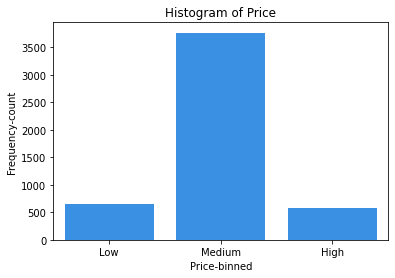

In [7]:
# add code here
bins=np.linspace(min(df['Price']),max(df['Price']),4)
group_names=['Low','Medium','High']
df['Price-binned']=pd.cut(df['Price'],bins,labels=group_names,include_lowest=True)
bin=list(df['Price-binned'])
# plt.hist(bin, edgecolor="red", bins=3)
ax = sns.countplot(df['Price-binned'], order=group_names, color='dodgerblue')
ax.set_title('Histogram of Price')
ax.set_xlabel('Price-binned')
ax.set_ylabel('Frequency-count')
plt.show()

**Let us see how the different features are correlated with each other by printing a Correlation Matrix**<br>
Hint: corr()

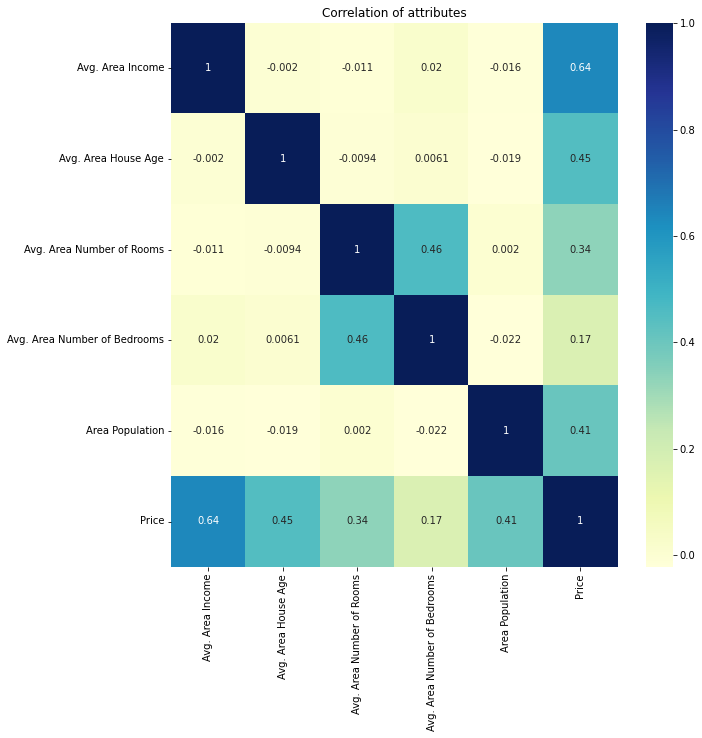

In [8]:
# add code here
plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu").set_title("Correlation of attributes")
plt.show()

### Feature and variable sets

**Make a list of data frame column names**
**Create a new dataframe containing all the numerical training features(note that Address is a string so ignore that) and store it in a variable called "X"**<br><br>
**Then create a new dataframe containing the target (Price) and store it in a variable called "y"**

In [9]:
# add code here
a=list(df.columns)
X=df.drop(['Address','Price-binned','Price'],axis=1)
y=df['Price']

In [10]:
# This code should print (5000, 5) and (5000,) if everything is correct
print(X.shape)
print(y.shape)

(5000, 5)
(5000,)


In [11]:
# print a few record of X
# add code here
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [12]:
# print a few record of y
# add code here
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

### Test-train split

**Import train_test_split function from scikit-learn**

In [13]:
# add code here
from sklearn.model_selection import train_test_split

**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [14]:
# add code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

**Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above)**

In [15]:
# add code here
test_size=0.3
print("Train_split_size and shape:",X.size,X.shape)
print("Test_split_size and shape:",y.size,y.shape)
print("Train/Test size ratio:",(1-test_size),":",test_size)


Train_split_size and shape: 25000 (5000, 5)
Test_split_size and shape: 5000 (5000,)
Train/Test size ratio: 0.7 : 0.3


### Model fit and training

**Import LinearRegression and metrics from scikit-learn**

In [16]:
# add code for imports here
# Create a Linear Regression object 'lm' by calling LinearRegression()
# add code here
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lm=LinearRegression()


**Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable**<br>
Hint: lm.fit()

In [17]:
# add code here
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Prediction, error estimate, and regression evaluation matrices

**Prediction using the lm model**<br>
Use model.predict() on X_test and store them in a variable called "predictions".<br>
Print type and size of the predictions. Size should be (1500,) if everything is correct.

In [18]:
# add code here
predictions=lm.predict(X_test)
print("Type of predictions:",type(predictions))
print("Size of predictions:",end="")
predictions.size

Type of predictions: <class 'numpy.ndarray'>
Size of predictions:

1500

**Since we're done with our predictions, let's compare it with y_test and see how accurate our predictions are.<br> Plot a Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line**

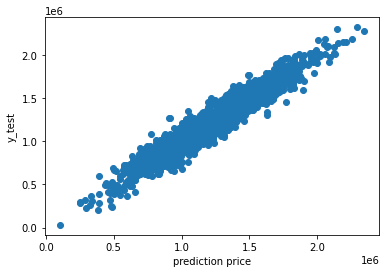

In [19]:
# add code here
plt.scatter(predictions,y_test)
plt.xlabel('prediction price')
plt.ylabel('y_test')
plt.show()

**Print the R-square value and round it to 3 decimal places**<br>
Hint: sklearn metrics.r2_score

In [20]:
# add code here
r2=metrics.r2_score(y_test,predictions)
print("R-square value(rounded to 3 decimal places):",round(r2,3))

R-square value(rounded to 3 decimal places): 0.917


# 2) K-nearest neighbor Classification

### Import packages and dataset

In [21]:
# import numpy, pandas, matplotlib, seaborn
# add code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read classified_data.txt using pandas and call head() to show first few records. Call this dataframe "df"** <br>
Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created.

In [22]:
# add code here
df=pd.read_csv('/content/gdrive/MyDrive/synapse_w2/classified_data.txt',index_col=[0])
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [23]:
# add code here
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [24]:
# add code here
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


### Check the spread of the features

**Store the column names in a list**

In [25]:
# add code here
col=list(df.columns)
col

['WTT',
 'PTI',
 'EQW',
 'SBI',
 'LQE',
 'QWG',
 'FDJ',
 'PJF',
 'HQE',
 'NXJ',
 'TARGET CLASS']

**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() 

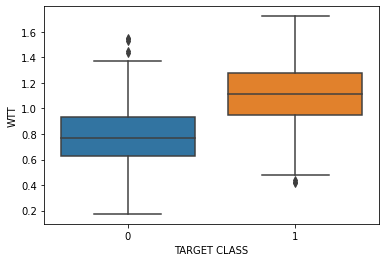

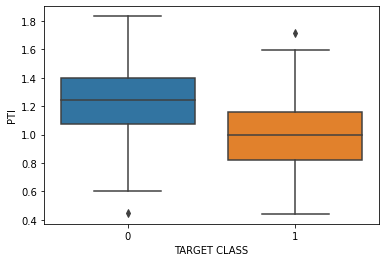

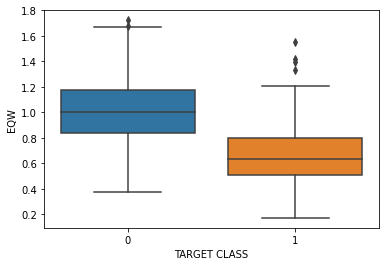

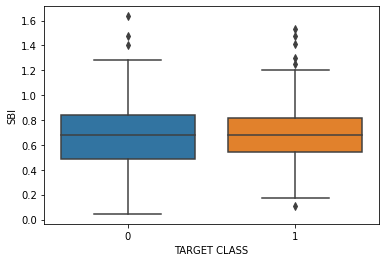

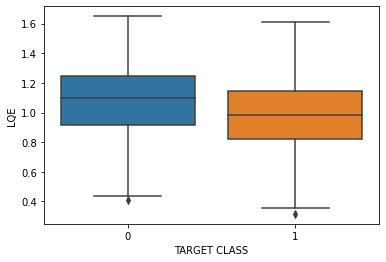

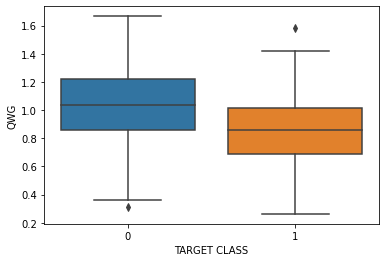

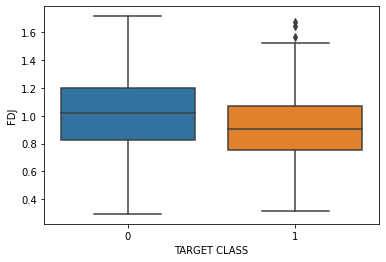

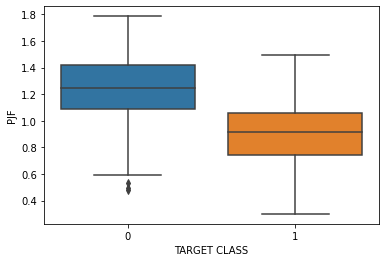

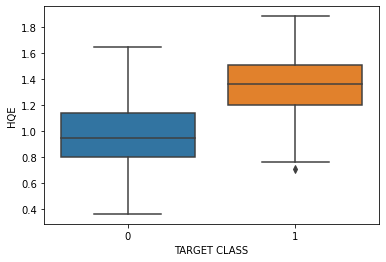

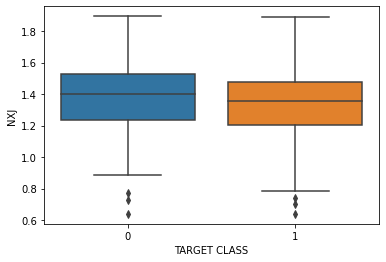

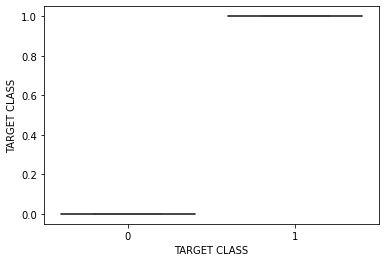

In [26]:
# add code here
for i in col:
 sns.boxplot(x=df['TARGET CLASS'],y=df[i])
 plt.show()

### Standardize the features using sklearn.preprocessing 
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.<br>
<br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [27]:
# add code here
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [28]:
# add code here
X=df.drop('TARGET CLASS',axis=1)
scaler.fit(X)
y=scaler.transform(X)
y

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

**Scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [29]:
# add code here
cols=list(X.columns)
df_feat=pd.DataFrame(y,columns=cols)
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initaial dataframe "df"

In [30]:
# add code here
X=df_feat
y=df['TARGET CLASS']

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [31]:
# add code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Model fit and training

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1. Fit this on X_train and y_train**

In [32]:
# add code here
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [33]:
# add code here
pred=kn.predict(X_test)

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [34]:
# add code here
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       161
           1       0.90      0.93      0.91       139

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



**Print the accuracy using numpy and round it to 3 decimal places.**

In [35]:
# add code here
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test,pred)
round(a,3)

0.92

### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [36]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
# for each in a list
# add code here
accuracy=[]
for i in range(1,61):
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train,y_train)
    pred=kn.predict(X_test)
    a=accuracy_score(y_test,pred)
    accuracy.append(round(a,3))
for i in range(1,60):
    if(max(accuracy)==accuracy[i]):
      k=i
      print("Value of n for which the accuracy is highest is:",k)
      break


Value of n for which the accuracy is highest is: 9


**Plot a graph of K value vs Accuracy**

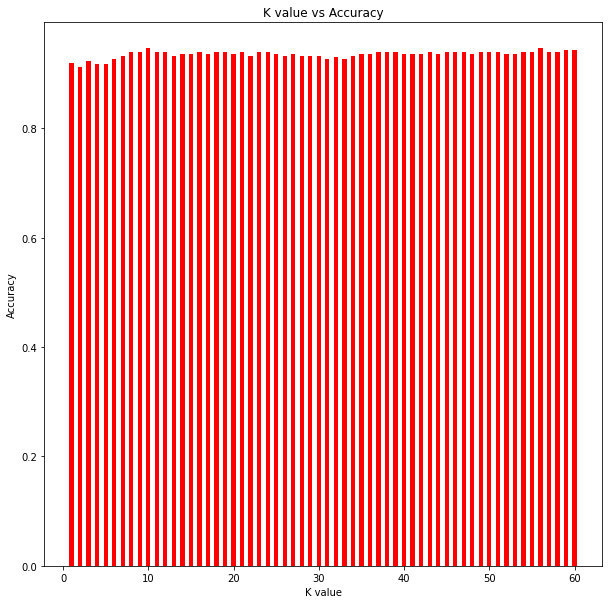

In [37]:
# add code here
fig = plt.figure(figsize = (10, 10))
k=[]
for i in range(1,61):
  k.append(i)
# creating the bar plot
plt.bar(k, accuracy, color ='red',
        width = 0.5)
 
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("K value vs Accuracy")
plt.show()

**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [38]:
# add code here 
for i in range(1,60):
    if(max(accuracy)==accuracy[i]):
      k=i
      print("Best value of n_neighbours is:",k)
      print("The best_value of n_neighbours is",k,"because on this value the accuracy is highest for the lowest number of neighbours.")
      print("The accuracy for the best value of n_neighbours:",accuracy[k])
      break

Best value of n_neighbours is: 9
The best_value of n_neighbours is 9 because on this value the accuracy is highest for the lowest number of neighbours.
The accuracy for the best value of n_neighbours: 0.947


# 3). Decision Tree Classifier

<b>read the titanic_data.csv using pandas and show the dataframe</b>

In [39]:
#write code here
df=pd.read_csv('/content/gdrive/MyDrive/synapse_w2/titanic_data.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<b>Write a function which accepts a dataframe, preprocesses the data (use task 1 notebook) and returns a new dataframe. </b> <br>
you may need a helper function for normalizing data so feel free to define that as well

In [40]:
def normalize(data_list):
  X_new = []
  X_max = max(data_list)
  X_min = min(data_list)
  for i in data_list:
    X_new.append( (i - X_min)/(X_max - X_min) )
  return X_new
def titanic_preprocessing_pipeline(df):
  #enter preprocessing steps as done in task 1
  #make sure the preprocessed dataframe looks like the output in task 1
  print("Preprocessing Steps:")
  #a. Removing unnecessary columns
  print("Removing unneccessary columns")
  df.drop(["PassengerId", "Ticket", "Name"], axis=1, inplace=True)
  print(df.head())

  #b. Nan analysis
  print("Nan analysis")
  df_nan = pd.DataFrame()

  nan_dict = {}
  for i in df.columns:
      nan_dict[i] = (df[i].isnull().sum()/len(df))*100

  df_nan["Column"] = nan_dict.keys()
  df_nan["nan_percentage"] = nan_dict.values() 
  print(df_nan)
  df.drop(["Cabin"], axis=1, inplace=True)
  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
  df["Age"].fillna(df["Age"].mean(), inplace=True)
  df_nan = pd.DataFrame()

  nan_dict = {}
  for i in df.columns:
    nan_dict[i] = (df[i].isnull().sum()/len(df))*100

  df_nan["Column"] = nan_dict.keys()
  df_nan["nan_percentage"] = nan_dict.values() 
  print(df_nan)
  
  #c. Adding features to the dataset
  print("Adding features to the dataset")
  df["Family_members"] = df["SibSp"] + df["Parch"]
  df.drop(["SibSp", "Parch"], axis=1, inplace=True)
  print(df)
  
  #d. Scaling and Normalization
  print("Scaling and Normalization")
  df["Age"] = normalize(df["Age"])
  df["Fare"] = normalize(df["Fare"])
  df["Family_members"] = normalize(df["Family_members"])   
  print(df)
  
  #e. One hot encoding
  print("One hot encoding")
  df_ohe = pd.get_dummies(df, columns=["Pclass", "Sex", "Title", "Embarked"])
  print(df_ohe)
  
  #return the dataframe
  return df_ohe
  # pass #remove this line after writing the code

<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [41]:
#write code here
X= df.drop(['Ticket', 'Cabin', 'Name','Sex','Embarked'], axis=1)
X.dropna(inplace= True)
y=X['Survived']

<b>remove the y_label (survived) from the dataframe</b>

In [42]:
#write code here
X.drop('Survived',axis=1,inplace=True)

<b>Split the data into train and test. (do a split in the ratio 30:70)</b>

In [43]:
#write code here
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>

Make sure that you play with the hyperparameters to get a good result. You can even use bagging and boosting methods like random forest or adaboost to improve your accuracy. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

<b>Note that the accuracy on the test set will be considered and brownie points for not overfitting the model in the process</b>

In [44]:
#write code here
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy")
dt=dt.fit(X_train,y_train)
y_pred_tree = dt.predict(X_test)
y_train_tree = dt.predict(X_train)

<b>print the test accuracy and train accuracy here</b>

In [45]:
#write code here
ac_dt= accuracy_score(y_train, y_train_tree)
print("Train accuracy for Decision Tree: ",ac_dt)
ac_dt1= accuracy_score(y_test, y_pred_tree)
print("Test accuracy for Decision Tree: ",ac_dt1)

Train accuracy for Decision Tree:  1.0
Test accuracy for Decision Tree:  0.6558139534883721
